In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read data from D3.csv as our dataset
dataset = pd.read_csv('./D3.csv')

In [3]:
dataset.head() #default value of .head() is 5 rows

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [4]:
M = len(dataset)
M

100

In [9]:
X1 = dataset.values[:,0]
X2 = dataset.values[:,1]
X3 = dataset.values[:,2]
y = dataset.values[:,3]
m = len(y)
print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('y = ', y[: 5]) 

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

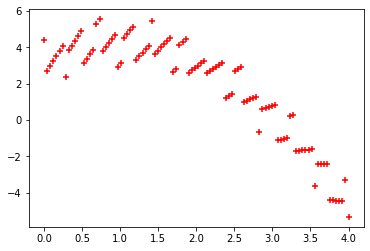

In [10]:
plt.scatter(X1, y, color='red', marker='+')
plt.grid

In [12]:
#Declare X_0 (which is an array of 1s because X0 is always 1)
X_0 = np.ones((m,1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [36]:
X1_1 = X1.reshape(m,1)
print('X1_1:\n', X1_1[:10])
X2_1 = X2.reshape(m,1)
print('X2_1:\n', X2_1[:10])
X3_1 = X3.reshape(m,1)
print('X3_1:\n', X3_1[:10])

X1_1:
 [[0.        ]
 [0.04040404]
 [0.08080808]
 [0.12121212]
 [0.16161616]
 [0.2020202 ]
 [0.24242424]
 [0.28282828]
 [0.32323232]
 [0.36363636]]
X2_1:
 [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]
 [2.91474747]
 [3.60969697]
 [0.30464646]
 [0.99959596]
 [1.69454546]]
X3_1:
 [[0.44      ]
 [0.88848485]
 [1.3369697 ]
 [1.78545454]
 [2.23393939]
 [2.68242424]
 [3.13090909]
 [3.57939394]
 [0.02787879]
 [0.47636364]]


In [46]:
#Combine X0 and X1 into one array
X_1st = np.hstack((X_0, X1_1))
print('X_1st:\n',X_1st[:5])
X_2nd = np.hstack((X_0, X2_1))
print('X_2nd:\n',X_2nd[:5])
X_3rd = np.hstack((X_0, X3_1))
print('X_3rd:\n',X_3rd[:5])

X_1st:
 [[1.         0.        ]
 [1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]]
X_2nd:
 [[1.         3.44      ]
 [1.         0.1349495 ]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]]
X_3rd:
 [[1.         0.44      ]
 [1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545454]
 [1.         2.23393939]]


In [47]:
#Parameters (intially are equal to zero)
theta = np.zeros(2)
theta

array([0., 0.])

In [48]:
def compute_cost(X, y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

In [49]:
# Lets compute the cost for theta values
costX1 = compute_cost(X_1st, y, theta)
print('The cost for given values of theta_0 and theta_1 =', costX1)
costX2 = compute_cost(X_2nd, y, theta)
print('The cost for given values of theta_0 and theta_1 =', costX2)
costX3 = compute_cost(X_3rd, y, theta)
print('The cost for given values of theta_0 and theta_1 =', costX3)

The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [50]:
def gradient_descent(X, y, theta, alpha, iterations):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(m x 1)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 alpha : Learning rate. Scalar value
 iterations: No of iterations. Scalar value.
 Output Parameters
 -----------------
 theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
 cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
 """
 cost_history = np.zeros(iterations)
 for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, y, theta)
 return theta, cost_history

In [118]:
thetaX1 = [0., 0.]
thetaX2 = [0., 0.]
thetaX3 = [0., 0.]
iterations = 1500;
alpha1 = 0.01;
alpha2 = 0.001;
alpha3 = 0.01

In [126]:
thetaX1, costX1_history = gradient_descent(X_1st, y, thetaX1, alpha1, iterations)
print('Final value of theta =', thetaX1)
print('cost_history =', costX1_history)

thetaX2, costX2_history = gradient_descent(X_2nd, y, thetaX2, alpha2, iterations)
print('Final value of theta =', thetaX2)
print('cost_history =', costX2_history)

thetaX3, costX3_history = gradient_descent(X_3rd, y, thetaX3, alpha3, iterations)
print('Final value of theta =', thetaX3)
print('cost_history =', costX3_history)

Final value of theta = [ 5.92043383 -2.03541173]
cost_history = [0.99056467 0.99054    0.99051545 ... 0.98500035 0.98500032 0.98500029]
Final value of theta = [0.50420806 0.6478467 ]
cost_history = [3.61269261 3.6126867  3.6126808  ... 3.60622989 3.60622685 3.60622381]
Final value of theta = [ 2.86831421 -0.51925373]
cost_history = [3.63052142 3.63051661 3.63051183 ... 3.62945239 3.62945239 3.62945238]


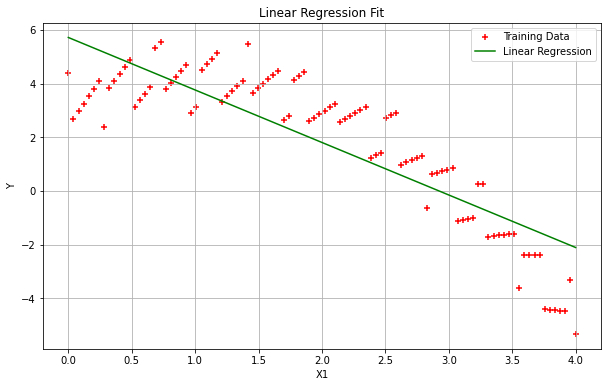

In [120]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X_1st[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X_1st[:,1],X_1st.dot(thetaX1), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

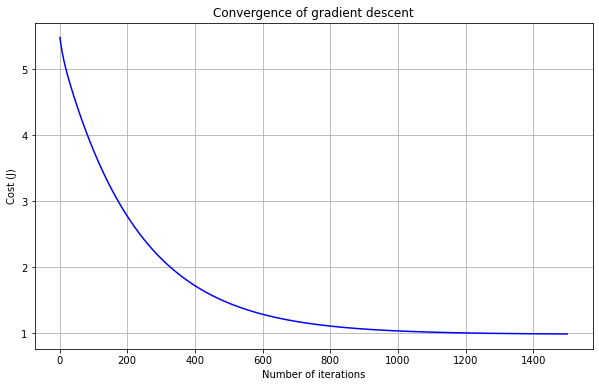

In [121]:
plt.plot(range(1, iterations + 1),costX1_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

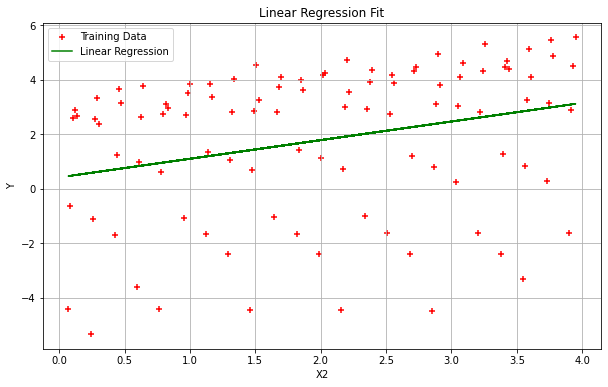

In [122]:
plt.scatter(X_2nd[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X_2nd[:,1],X_2nd.dot(thetaX2), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

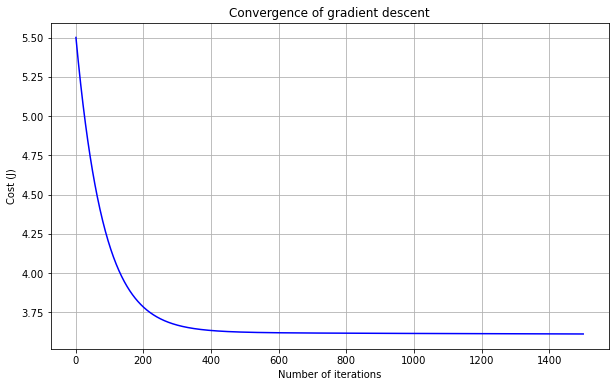

In [123]:
plt.plot(range(1, iterations + 1),costX2_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

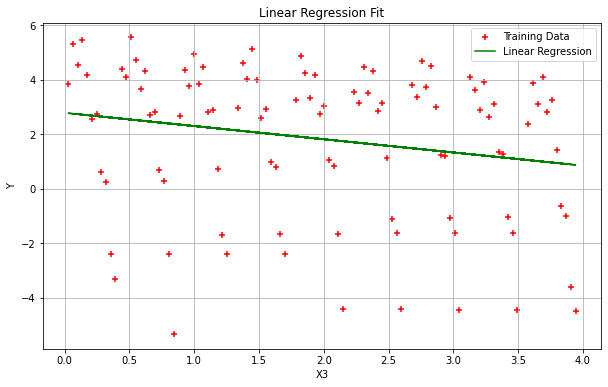

In [124]:
plt.scatter(X_3rd[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X_3rd[:,1],X_3rd.dot(thetaX3), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

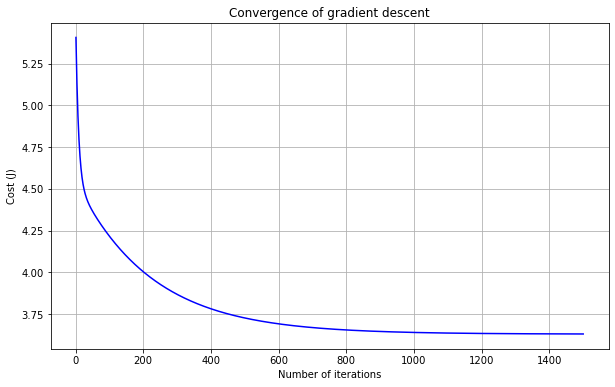

In [125]:
plt.plot(range(1, iterations + 1),costX3_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')